In [98]:
import pandas as pd

In [99]:
from pathlib import Path
from glob import glob
import json

### Process a single datapoint

In [135]:
with open('data/val/2017_10386236.json') as json_file:
    data = json.load(json_file)

In [136]:
data

{'id': '2017_10386236',
 'image_path': 'images/val2017/2017_10386236.jpg',
 'labels': ['a10_face_partial',
  'a16_race',
  'a17_color',
  'a1_age_approx',
  'a4_gender',
  'a65_rel_social',
  'a6_hair_color',
  'a9_face_complete'],
 'openimages_id': '1fa8534db0514d02',
 'source_url': 'https://farm3.staticflickr.com/5146/5679551013_6a37285d20_o.jpg'}

## Load dataset

In [223]:
def func(index,file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
        data.update(dict.fromkeys(data['labels'],1))
        data.pop('labels')
    return pd.DataFrame(data, index=[index])

In [224]:
data = func(0, 'data/val/2017_10386236.json') # test output

In [225]:
data

,id,image_path,openimages_id,source_url,a10_face_partial,a16_race,a17_color,a1_age_approx,a4_gender,a65_rel_social,a6_hair_color,a9_face_complete
0,2017_10386236,images/val2017/2017_10386236.jpg,1fa8534db0514d02,https://farm3.staticflickr.com/5146/5679551013...,1,1,1,1,1,1,1,1


In [226]:
file_paths=(glob('data/val/*.json'))
df = pd.concat([func(counter,file) for counter, file in enumerate(file_paths)])

In [227]:
df.head()

,id,image_path,openimages_id,source_url,a0_safe,a17_color,a6_hair_color,a16_race,a1_age_approx,a24_birth_date,...,a92_email_content,a35_mail,a32_drivers_license,a58_hobbies,a79_address_home_partial,a62_opinion_political,a85_username,a97_online_conversation,a13_full_nudity,a7_fingerprint
0,2017_10735550,images/val2017/2017_10735550.jpg,4bb51c80f97a81d6,https://farm7.staticflickr.com/4028/4330838526...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017_48376799,images/val2017/2017_48376799.jpg,3db51df4047d9df2,https://farm3.staticflickr.com/8706/1706166171...,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017_56926780,images/val2017/2017_56926780.jpg,36dcde3b23e915f5,https://farm6.staticflickr.com/4129/4831479058...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017_67658695,images/val2017/2017_67658695.jpg,54d9d29348782d63,https://farm4.staticflickr.com/3951/1535612932...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017_77918314,images/val2017/2017_77918314.jpg,5e055bef92fb869c,https://c5.staticflickr.com/4/3402/3561446980_...,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
assert(len(df.columns[4:])==68) # ensure that all attributes reconcile

In [229]:
attributes=df.columns[4:]

In [230]:
df_filled=df[attributes].fillna(0)

In [246]:
df_filled.describe()

,a0_safe,a17_color,a6_hair_color,a16_race,a1_age_approx,a24_birth_date,a29_ausweis,a2_weight_approx,a3_height_approx,a4_gender,...,a92_email_content,a35_mail,a32_drivers_license,a58_hobbies,a79_address_home_partial,a62_opinion_political,a85_username,a97_online_conversation,a13_full_nudity,a7_fingerprint
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,...,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.00000,4167.000000,4167.000000,4167.000000,4167.000000
mean,0.369330,0.472522,0.443964,0.442045,0.414447,0.008879,0.002160,0.235421,0.178066,0.467963,...,0.001920,0.007439,0.002880,0.019918,0.002640,0.00408,0.006000,0.006000,0.001680,0.001680
std,0.482681,0.499304,0.496910,0.496689,0.492685,0.093822,0.046429,0.424313,0.382614,0.499032,...,0.043779,0.085941,0.053593,0.139737,0.051317,0.06375,0.077233,0.077233,0.040957,0.040957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [233]:
df

,id,image_path,openimages_id,source_url,a0_safe,a17_color,a6_hair_color,a16_race,a1_age_approx,a24_birth_date,...,a92_email_content,a35_mail,a32_drivers_license,a58_hobbies,a79_address_home_partial,a62_opinion_political,a85_username,a97_online_conversation,a13_full_nudity,a7_fingerprint
0,2017_10735550,images/val2017/2017_10735550.jpg,4bb51c80f97a81d6,https://farm7.staticflickr.com/4028/4330838526...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017_48376799,images/val2017/2017_48376799.jpg,3db51df4047d9df2,https://farm3.staticflickr.com/8706/1706166171...,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017_56926780,images/val2017/2017_56926780.jpg,36dcde3b23e915f5,https://farm6.staticflickr.com/4129/4831479058...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017_67658695,images/val2017/2017_67658695.jpg,54d9d29348782d63,https://farm4.staticflickr.com/3951/1535612932...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017_77918314,images/val2017/2017_77918314.jpg,5e055bef92fb869c,https://c5.staticflickr.com/4/3402/3561446980_...,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,2017_21696592,images/val2017/2017_21696592.jpg,10f0988af7cc00cd,https://c6.staticflickr.com/3/2838/13661917593...,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4163,2017_88190509,images/val2017/2017_88190509.jpg,ed5c6fa3f9453da3,https://farm4.staticflickr.com/1285/575095503_...,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4164,2017_99741750,images/val2017/2017_99741750.jpg,71225afb2aae8042,https://farm3.staticflickr.com/4092/5032797510...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4165,2017_53891270,images/val2017/2017_53891270.jpg,4985e242b1feb5a4,https://farm5.staticflickr.com/8248/8554548902...,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Series

In [234]:
df_filled['a0_safe'].unique()

array([1., 0.])

In [235]:
pd.value_counts(df_filled['a0_safe'].values,sort=False)

1.0    1539
0.0    2628
dtype: int64

### DataFrame

In [236]:
df_filled.apply(pd.value_counts)

,a0_safe,a17_color,a6_hair_color,a16_race,a1_age_approx,a24_birth_date,a29_ausweis,a2_weight_approx,a3_height_approx,a4_gender,...,a92_email_content,a35_mail,a32_drivers_license,a58_hobbies,a79_address_home_partial,a62_opinion_political,a85_username,a97_online_conversation,a13_full_nudity,a7_fingerprint
0.0,2628,2198,2317,2325,2440,4130,4158,3186,3425,2217,...,4159,4136,4155,4084,4156,4150,4142,4142,4160,4160
1.0,1539,1969,1850,1842,1727,37,9,981,742,1950,...,8,31,12,83,11,17,25,25,7,7


## Visualisation

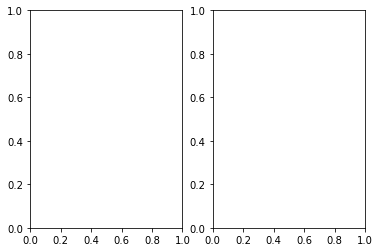

In [245]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

## Attribute data (taken from Github)

In [89]:
attr = pd.read_csv('vpa-master/attributes.tsv',sep='\t')

In [90]:
attr = np.array(attr['attribute_id'])